# Twitter trolls - how Russia meddles with western democracies


## Abstract
Over the last several years there has been an attempt from Russian trolls to spread propaganda and fake news over social media in order to spread political ideas among the general population both nationally and internationally. Can these attempts be regarded as undermining the democracy of the affected countries?

In this project we are going to analyze a great number of these russian tweets and look into their motivations for this meddling. We will mainly look into their overall political goals in the US, and examine how these goals change over time. Have the trolls achieved their goals? We will also look into how the trolls operate and organize themselves, trying to find patterns in the madness. Such patterns can hopefully help the general population to indicate that a tweet is originating from a troll. As the Russian efforts are increasing every year, a solution is needed to defend the democracy.

## Research questions

-Which themes does the propaganda mainly revolve around? About which issues should people be particularly careful not to believe everything they read?

Darren: "A lot of this has been done . . . at least with the English language data. More needs to be done on the European data."

-Does the trolls advocate for a common political stance in each specific country? If so which leaning do they have? If not, how polarized are the tweets between left leaning and right leaning?

Darren comment: Again, this has been done on the English language data. I'm unaware to what extent it has been done on the European data. I would highly recommend looking closely at the German data. There is a good volume there and I have not spoken to anyone working with it. I tried to get a story in Der Speigel and spoke at length with a journalist there, but nothing came of it.

-Were the trolls united with a common political leaning in the period after the primaries in the US elections?

Darren comment: 
Some of this analysis appears in the fivethirtyeight article.

-Was the original mission of the Russian trolls for the US election to make sure that Clinton was not elected, or to get Trump elected?

Darren: done

-Are the trolls organized as a unit? Do they interact with each other (retweets, etc)?

Darren: interesting

-Is there a way for people without a technical background to determine if a tweet is coming from a Russian troll?

## Research questions

IRA russian twitter trolls - Three million tweets amounting to 175 Mb, along with a detailed description of the dataset

This dataset contains around three million tweets and retweets from 2848 unique twitter users. Each tweet has several attributes, some of them are extracted from the tweet itself. For instance the author, content, and time stamp. Other attributes are later added. An example of such attributes is category of the troll, e.g. RightTroll, NewsFeed, etc.

There are many factors that we can examine in the dataset. Looking at given features like timing could be very interesting to find patterns. We also intend to add features, in order to make the dataset more suitable for our analysis. As every data point contains the whole tweet itself, it is possible to perform a broad analysis on the content. This could be used to determine whether a certain person or word is mentioned, and add the overall theming as a feature. Another example of a possible extra feature is stating whether a tweet is a retweet of another troll, unique, or identical to another tweet in the set.

The data set it pretty small so it should be pretty manageable to process with pandas, but spark could also be used.

## Requierements

The second task is to intimately acquaint yourself with the data, preprocess it and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you’ve advanced with your understanding of the project goals by updating its README description.

When describing the data, in particular, you should show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s into the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have updated your plan in a reasonable way, reflecting your improved knowledge after data acquaintance. In particular, discuss how your data suits your project needs and discuss the methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is now reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these previous steps (or other reasonable ones) have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project.

## Description of second data set: 

- rus_troll_user.csv : Contains user specific features. (nickname, description field, follower count etc.)
- rus_troll_tweet_text.csv: Contains text and language of the given tweet. You will use this if you are doing text classification, sentiment analysis, topic detection etc. 
- rus_troll_tweet_metadata.csv: Contains features that are user specific, but may change tweet to tweet.
- rus_troll_tweet_stats.csv: Contains other (imo important) tweet features

In [4]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import scipy as sp
from pyspark.sql import *
import matplotlib.pyplot as plt
from statistics import median 
%matplotlib inline
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql.types import *
from matplotlib.pyplot import figure
#import pyspark.sql.SQLContext
from ipywidgets import *
%matplotlib inline

spark = SparkSession.builder.getOrCreate()

In [5]:
data_folder = './data/'

In [120]:
zip_file = ZipFile('russian-troll-tweets.zip')
zip_file_new = ZipFile("New_russian_tweets.zip")
data = pd.DataFrame()
new_data = pd.DataFrame()


In [7]:
for i in range(1,9):
    data = data.append(pd.read_csv(zip_file.open("IRAhandle_tweets_"+str(i)+".csv")))
data=data.reset_index()

In [121]:
new_troll_user = pd.read_csv(zip_file_new.open("rus_troll_user.csv"), header = 1)
new_troll_text = pd.read_csv(zip_file_new.open("rus_troll_tweet_metadata.csv"))
new_troll_metadata = pd.read_csv(zip_file_new.open("rus_troll_tweet_text.csv"))
new_troll_stats = pd.read_csv(zip_file_new.open("rus_troll_tweet_stats.csv"))

/Users/Hakon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I am going to load in the files as spark dataframe as well:

In [ ]:
#spark_rus_text = spark.read.csv("New_russian_tweets/rus_troll_tweet_text.csv")
#spark_rus_metadata = spark.read.csv("New_russian_tweets/rus_troll_tweet_metadata.csv")
#spark_rus_stats = spark.read.csv("New_russian_tweets/rus_troll_tweet_stats.csv")
#spark_rus_user = spark.read.csv("New_russian_tweets/rus_troll_user.csv")

In [9]:
datas = data["account_type"]
datas

0          Right
1          Right
2          Right
3          Right
4          Right
5          Right
6          Right
7          Right
8          Right
9          Right
10         Right
11         Right
12         Right
13         Right
14         Right
15         Right
16         Right
17         Right
18         Right
19         Right
20         Right
21         Right
22         Right
23         Right
24         Right
25         Right
26         Right
27         Right
28         Right
29         Right
           ...  
2935786     left
2935787     left
2935788     left
2935789     left
2935790     left
2935791     left
2935792     left
2935793     left
2935794     left
2935795     left
2935796     left
2935797     left
2935798     left
2935799     left
2935800     left
2935801     left
2935802     left
2935803     left
2935804     left
2935805     left
2935806     left
2935807     left
2935808     left
2935809     left
2935810     left
2935811     left
2935812     left
2935813     le

In [10]:
#spark_rus_user.show()
data["publish_date"] =   pd.to_datetime(data["publish_date"], format='%m/%d/%Y\n%H:%M')

Write and read it as parquet files.

In [57]:
#spark_rus_text.write.parquet("spark_rus_text.parquet2")
#spark_rus_stats.write.parquet("spark_rus_stats.parquet")
#spark_rus_metadata.write.parquet("spark_rus_metadata.parquet")
#spark_rus_user.write.parquet("spark_rus_user.parquet")
spark_rus_text = spark.read.parquet("spark_rus_text.parquet2")
spark_rus_metadata = spark.read.parquet("spark_rus_metadata.parquet")
spark_rus_user = spark.read.parquet("spark_rus_user.parquet")
spark_rus_stats = spark.read.parquet("spark_rus_stats.parquet")

In [60]:
spark_rus_metadata.show()
spark_rus_text.show()
spark_rus_stats.show()

+------------------+--------------+---------------+--------+---------+------------------+
|               _c0|           _c1|            _c2|     _c3|      _c4|               _c5|
+------------------+--------------+---------------+--------+---------+------------------+
|           tweetid|follower_count|following_count|latitude|longitude| tweet_client_name|
|849295393867399169|          4042|           1470|    null|     null|Twitter Web Client|
|567280957913587713|           272|            390|    null|     null|          iziaslav|
|493095247690612736|            89|            223|    null|     null|          vavilonX|
|493892174069903360|            89|            223|    null|     null|          vavilonX|
|512503798506721280|            89|            223|    null|     null|          vavilonX|
|499624206246871041|            89|            223|    null|     null|          vavilonX|
|491828568251707392|            89|            223|    null|     null|          vavilonX|
|493768356

In [ ]:
new_troll_user.head(20)
display(new_troll_user.shape)
new_troll_text.shape

In [ ]:
display(new_troll_user["account_language"].unique())
#new_troll_user["account_language"].drop
new_troll_user

I am not keen to keep zh-cn, which is chinese, ar, which is arabic. id, which is indonesian, and uk which is ukrainian and ru, which is russian. But what if they tweet in english?

In [ ]:
new_troll_metadata.head(100)
new_troll_metadata.shape

In [ ]:
new_troll_text.head(30)
new_troll_text.shape

In [ ]:
new_troll_stats.head(30)

In [ ]:
data["language"].unique()

HÅKON

Ting å gjøre: Slå sammen twitter id og tweets for å sjekke hvilket språk de twitrer på. Kan arabiske folk twitre på engelsk? 

## Old dataset

In [173]:
datad = data.drop(columns=["retweet", "index", "new_june_2018", "harvested_date"]) # also"harvested_date","new_june_2018",

KeyError: "['retweet' 'index' 'new_june_2018' 'harvested_date'] not found in axis"

In [181]:
datad = datad.drop_duplicates()
duplicates_number = datas.shape[0]-datad.shape[0] #må endres til data eller noe som er faktisk
print(duplicates_number) 




28169

In [186]:
testtt = datad.drop_duplicates(subset= ["external_author_id", "content", "following", "followers", "updates", "post_type"])
#Kan bruke dette til noe i en cleaningtabell av noe slag
print(datad.shape[0]-testtt.shape[0])

404


In [13]:
display(datad["account_category"].unique())
display(datad["account_type"].unique())
display(datad["post_type"].unique())
display(datad["region"].unique())
#clean

array(['RightTroll', 'NonEnglish', 'Fearmonger', 'LeftTroll', 'Unknown',
       'HashtagGamer', 'NewsFeed', 'Commercial'], dtype=object)

array(['Right', 'Russian', 'Koch', 'Italian', 'left', '?', 'German',
       'Spanish', 'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'Ukranian', 'ZAPOROSHIA', 'news', 'right', 'Uzbek', 'Ebola ', nan,
       'Portuguese'], dtype=object)

array([nan, 'RETWEET', 'QUOTE_TWEET'], dtype=object)

array(['Unknown', nan, 'United States', 'Italy', 'United Arab Emirates',
       'Japan', 'Israel', 'Azerbaijan', 'Egypt', 'United Kingdom',
       'Russian Federation', 'Turkey', 'Iraq', 'Germany', 'France',
       'Ukraine', 'Serbia', 'Hong Kong', 'Austria', 'Belarus', 'Malaysia',
       'Spain', 'Samoa', 'India', 'Afghanistan', 'Saudi Arabia',
       'Iran, Islamic Republic of', 'Mexico', 'Canada', 'Greece',
       'Czech Republic', 'Finland', 'Latvia', 'Estonia', 'Sweden',
       'Denmark', 'Switzerland'], dtype=object)

Since nan-tweets are only original tweets, i want to change this values to ORIGINAL_TWEETS

In [182]:
datad["post_type"] = datad["post_type"].fillna("ORIGINAL")
datad 
#clean


,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,1052,9636,253,ORIGINAL,Right,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,1054,9637,254,ORIGINAL,Right,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,1054,9637,255,RETWEET,Right,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,1062,9642,256,ORIGINAL,Right,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,1050,9645,246,RETWEET,Right,RightTroll
5,9.060000e+17,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,2017-10-01 02:47:00,1050,9644,247,ORIGINAL,Right,RightTroll
6,9.060000e+17,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,2017-10-01 02:48:00,1050,9644,248,RETWEET,Right,RightTroll
7,9.060000e+17,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,2017-10-01 02:52:00,1050,9644,249,ORIGINAL,Right,RightTroll
8,9.060000e+17,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,2017-10-01 03:47:00,1050,9646,250,ORIGINAL,Right,RightTroll
9,9.060000e+17,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,2017-10-01 03:51:00,1050,9646,251,ORIGINAL,Right,RightTroll


In [183]:
isna_columns = datad.isna().any(axis=0)
column_nan_list = isna_columns[isna_columns== True].index.tolist()
#datad[index_nan_list]
column_nan_list
#clean

['external_author_id', 'content']

We can see that 4 categories has nan-values. We want to know the count of nan-values in each row.

In [184]:
for x in column_nan_list:
    print(x, ":", datad[x].isnull().sum())
    #clean

external_author_id : 5
content : 5


Since account_type already has "?" as a type, we set account_type to this. We drop the tweets with content = nan and external id = nan. For region we do the same as with account_type, setting this to "unknown".

In [185]:
datad["account_type"] = datad["account_type"].fillna("?") #gjøre om right til Right?
datad["region"] = datad["region"].fillna("Unknown")
datad[["content", "external_author_id"]] = datad[["content", "external_author_id"]].dropna()
#clean

In [18]:
datad

,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,1052,9636,253,ORIGINAL,Right,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,1054,9637,254,ORIGINAL,Right,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,1054,9637,255,RETWEET,Right,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,1062,9642,256,ORIGINAL,Right,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,1050,9645,246,RETWEET,Right,RightTroll
5,9.060000e+17,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,2017-10-01 02:47:00,1050,9644,247,ORIGINAL,Right,RightTroll
6,9.060000e+17,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,2017-10-01 02:48:00,1050,9644,248,RETWEET,Right,RightTroll
7,9.060000e+17,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,2017-10-01 02:52:00,1050,9644,249,ORIGINAL,Right,RightTroll
8,9.060000e+17,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,2017-10-01 03:47:00,1050,9646,250,ORIGINAL,Right,RightTroll
9,9.060000e+17,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,2017-10-01 03:51:00,1050,9646,251,ORIGINAL,Right,RightTroll


Vi kan kanskje plotte histogram over hvor mange tweets hver bruker twitrer?

In [19]:
datade = datad.loc[data['language'] == "English"]
datade = datade.sort_values("publish_date")
datade

,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,account_category
687349,4.437234e+09,CRYSTAL1JOHNSON,Resale homes sales R up. As we learned from th...,United States,English,2012-02-06 20:24:00,4,0,2,ORIGINAL,left,LeftTroll
687369,4.437234e+09,CRYSTAL1JOHNSON,Good morning! There is so much we have to be t...,United States,English,2012-02-07 13:24:00,4,0,4,ORIGINAL,left,LeftTroll
687391,4.437234e+09,CRYSTAL1JOHNSON,The reality is becoming increasingly pellucid:...,United States,English,2012-02-08 13:37:00,7,0,4,ORIGINAL,left,LeftTroll
686933,4.437234e+09,CRYSTAL1JOHNSON,“The content of your character is your choice....,United States,English,2012-02-14 12:45:00,7,1,8,ORIGINAL,left,LeftTroll
687259,4.437234e+09,CRYSTAL1JOHNSON,"""Coming together is a beginning. Keeping toget...",United States,English,2012-02-29 14:32:00,7,2,9,ORIGINAL,left,LeftTroll
688172,4.437234e+09,CRYSTAL1JOHNSON,What lies behind us and what lies between us a...,United States,English,2012-03-07 14:42:00,7,2,9,ORIGINAL,left,LeftTroll
688194,4.437234e+09,CRYSTAL1JOHNSON,"""I immerse my mind with good positive thoughts...",United States,English,2012-03-08 14:25:00,7,2,11,ORIGINAL,left,LeftTroll
687494,4.437234e+09,CRYSTAL1JOHNSON,To Follow or Not To Follow: Should Small Busin...,United States,English,2012-03-12 05:32:00,7,2,12,ORIGINAL,left,LeftTroll
687603,4.437234e+09,CRYSTAL1JOHNSON,Interest Rates are on the move: the biggest ju...,United States,English,2012-03-16 12:42:00,7,2,14,ORIGINAL,left,LeftTroll
687604,4.437234e+09,CRYSTAL1JOHNSON,“My philosophy is that not only r u responsibl...,United States,English,2012-03-16 12:42:00,7,2,13,ORIGINAL,left,LeftTroll


In [20]:
#datade.to_parquet("datade.parquet")
english_parqdata = pd.read_parquet('datade.parquet')

In [21]:
english_parqdata

,level_0,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,region,updates
3623165,306333,LeftTroll,left,CRYSTAL1JOHNSON,Resale homes sales R up. As we learned from th...,4.437234e+09,0,4,English,ORIGINAL,2012-02-06 20:24:00,United States,2
687349,687349,LeftTroll,left,CRYSTAL1JOHNSON,Resale homes sales R up. As we learned from th...,4.437234e+09,0,4,English,ORIGINAL,2012-02-06 20:24:00,United States,2
687369,687369,LeftTroll,left,CRYSTAL1JOHNSON,Good morning! There is so much we have to be t...,4.437234e+09,0,4,English,ORIGINAL,2012-02-07 13:24:00,United States,4
3623185,306353,LeftTroll,left,CRYSTAL1JOHNSON,Good morning! There is so much we have to be t...,4.437234e+09,0,4,English,ORIGINAL,2012-02-07 13:24:00,United States,4
3623207,306375,LeftTroll,left,CRYSTAL1JOHNSON,The reality is becoming increasingly pellucid:...,4.437234e+09,0,7,English,ORIGINAL,2012-02-08 13:37:00,United States,4
687391,687391,LeftTroll,left,CRYSTAL1JOHNSON,The reality is becoming increasingly pellucid:...,4.437234e+09,0,7,English,ORIGINAL,2012-02-08 13:37:00,United States,4
3622749,305917,LeftTroll,left,CRYSTAL1JOHNSON,“The content of your character is your choice....,4.437234e+09,1,7,English,ORIGINAL,2012-02-14 12:45:00,United States,8
686933,686933,LeftTroll,left,CRYSTAL1JOHNSON,“The content of your character is your choice....,4.437234e+09,1,7,English,ORIGINAL,2012-02-14 12:45:00,United States,8
3623075,306243,LeftTroll,left,CRYSTAL1JOHNSON,"""Coming together is a beginning. Keeping toget...",4.437234e+09,2,7,English,ORIGINAL,2012-02-29 14:32:00,United States,9
687259,687259,LeftTroll,left,CRYSTAL1JOHNSON,"""Coming together is a beginning. Keeping toget...",4.437234e+09,2,7,English,ORIGINAL,2012-02-29 14:32:00,United States,9


In [212]:
authors = english_parqdata[["external_author_id", "author", "account_category"]].drop_duplicates(subset = "external_author_id")
authors["tweet_count"] = english_parqdata.groupby('author')['author'].transform('count')
authors["peak_followers"] = english_parqdata.groupby(['author'], sort=True)['followers'].transform("max")
most_pop_authors = authors.sortby("peak_followers")
most_pop_authors
#authors["original_tweet_count"] = 


AttributeError: 'DataFrame' object has no attribute 'sortby'

Plotte top 10 lefttroll, top 10 righttroll, top 10 newsfeed.

In [22]:
data_month_days = english_parqdata["publish_date"].map(lambda x: str(x)[:7])
#if we want only month and days. 
month_count = data_month_days.value_counts()
month_count

2017-08    348812
2016-12    234766
2015-07    226924
2016-10    216678
2017-01    211014
2017-04    182790
2016-09    180528
2017-03    174298
2016-11    173448
2017-02    163610
2016-02    142710
2015-08    128954
2016-08    126070
2016-05    125944
2016-03    123890
2016-06    123838
2017-07    122934
2015-06    119752
2015-12    116542
2016-01    113508
2016-04     99762
2016-07     90270
2017-05     83002
2017-06     71608
2017-09     69400
2015-11     66036
2015-10     54020
2017-10     50630
2015-05     43572
2015-09     42436
            ...  
2018-01      3574
2018-02      3492
2018-03      3068
2018-04      1134
2018-05       702
2014-10       402
2014-08        70
2013-06        64
2013-07        56
2013-05        28
2012-03        26
2014-09        24
2012-06        16
2012-10        14
2012-05        14
2012-07        14
2012-02        10
2012-11         8
2012-12         8
2012-04         6
2013-01         6
2014-06         4
2013-02         4
2013-08         4
2013-12   

In [23]:
month_count.index

Index(['2017-08', '2016-12', '2015-07', '2016-10', '2017-01', '2017-04',
       '2016-09', '2017-03', '2016-11', '2017-02', '2016-02', '2015-08',
       '2016-08', '2016-05', '2016-03', '2016-06', '2017-07', '2015-06',
       '2015-12', '2016-01', '2016-04', '2016-07', '2017-05', '2017-06',
       '2017-09', '2015-11', '2015-10', '2017-10', '2015-05', '2015-09',
       '2015-03', '2017-11', '2015-01', '2015-02', '2015-04', '2017-12',
       '2014-12', '2014-11', '2018-01', '2018-02', '2018-03', '2018-04',
       '2018-05', '2014-10', '2014-08', '2013-06', '2013-07', '2013-05',
       '2012-03', '2014-09', '2012-06', '2012-10', '2012-05', '2012-07',
       '2012-02', '2012-11', '2012-12', '2012-04', '2013-01', '2014-06',
       '2013-02', '2013-08', '2013-12', '2012-08', '2014-04', '2014-07',
       '2013-04', '2014-02'],
      dtype='object')

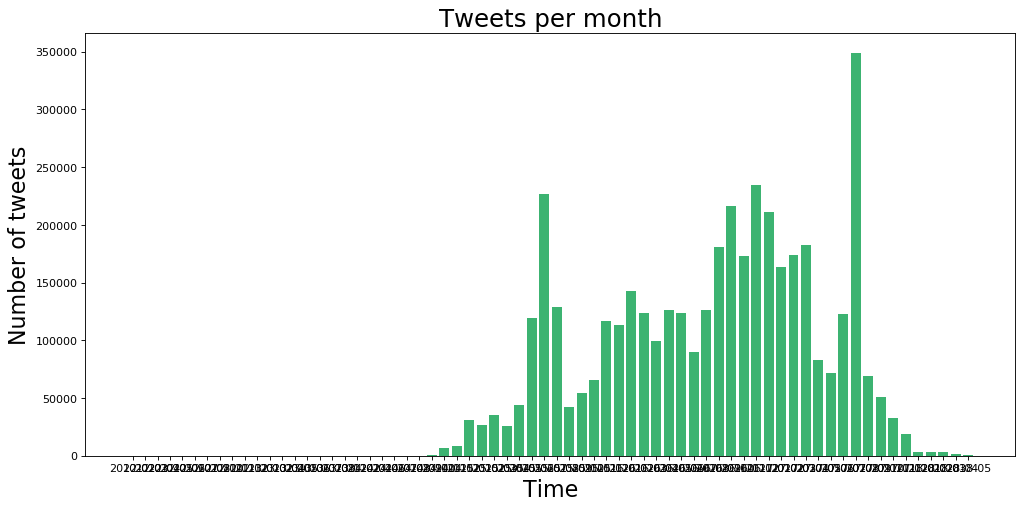

In [27]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.bar(month_count.index, month_count, color = "#3CB371")
name_axises("Tweets per month", "Time", "Number of tweets")
#xmin, xmax = fig['layout']['xaxis']['range']

# create FigureWidget from fig
#f = go.FigureWidget(data=fig.data, layout=fig.layout)

I am interested in getting the x-axis on this format: https://matplotlib.org/gallery/text_labels_and_annotations/date.html

In [ ]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);


In [26]:
def name_axises(title, xlab, ylab):
    plt.title(title, size=22), plt.xlabel(xlab, size=20), plt.ylabel(ylab, size=20)
# A function for future plotting to save some lines.

In [128]:
#english_parqdata["publish_date"]

### After primaries

In [29]:
#timedate_obj = datetime.strptime('06/14/2016 00:00', '%m/%d/%Y\n%H:%M')
after_primaries = english_parqdata.loc[english_parqdata["publish_date"] > "2016-06-14"]
after_primaries.head(2)

,level_0,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,region,updates
1517127,1517127,NewsFeed,local,KANSASDAILYNEWS,Kansas candidates get lessons in school fundin...,2.587844e+09,24995,10301,English,ORIGINAL,2016-06-14 00:01:00,United States,37582
5401662,273928,NewsFeed,local,SEATTLE_POST,"Falling to fourth, Washington men’s rowing was...",2.611151e+09,16518,9438,English,ORIGINAL,2016-06-14 00:01:00,United States,25801


In [82]:
after_primaries_time = after_primaries["publish_date"].map(lambda x: str(x)[:7]).value_counts()
after_primaries_time

2017-08    348812
2016-12    234766
2016-10    216678
2017-01    211014
2017-04    182790
2016-09    180528
2017-03    174298
2016-11    173448
2017-02    163610
2016-08    126070
2017-07    122934
2016-07     90270
2017-05     83002
2017-06     71608
2016-06     71144
2017-09     69400
2017-10     50630
2017-11     33084
2017-12     19224
2018-01      3574
2018-02      3492
2018-03      3068
2018-04      1134
2018-05       702
Name: publish_date, dtype: int64

In [105]:
after_primaries_left = after_primaries.loc[after_primaries["account_type"] == "left"]
ap_left_count = after_primaries_left["publish_date"].map(lambda x: str(x)[:7]).value_counts()
#pd.Index.rename(name = "j")
ap_left_count.sort_index()

2016-06    16372
2016-07    18768
2016-08    20742
2016-09    13678
2016-10    93170
2016-11    60756
2016-12    79100
2017-01    67970
2017-02    54770
2017-03    62612
2017-04    65464
2017-05    12894
2017-06     3592
2017-07    40514
2017-08    15864
2017-09      602
2017-10      464
2017-11     1084
2017-12     2464
2018-01     2586
2018-02     2644
2018-03     2388
2018-04     1132
2018-05      702
Name: publish_date, dtype: int64

In [108]:
after_primaries_right = after_primaries.loc[after_primaries["account_type"] == "Right"]
ap_right_count = after_primaries_right["publish_date"].map(lambda x: str(x)[:7]).value_counts()
ap_right_count

2017-08    319214
2016-09     76644
2017-09     66536
2017-04     60696
2017-01     59382
2016-12     54150
2017-02     52160
2017-03     51346
2017-10     49516
2016-11     45436
2016-10     42388
2017-07     34818
2017-11     31948
2017-06     26318
2017-05     23400
2017-12     16652
2016-08     12450
2016-07     11880
2016-06      5548
2018-01       986
2018-02       846
2018-03       674
Name: publish_date, dtype: int64

Index(['2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03'],
      dtype='object')

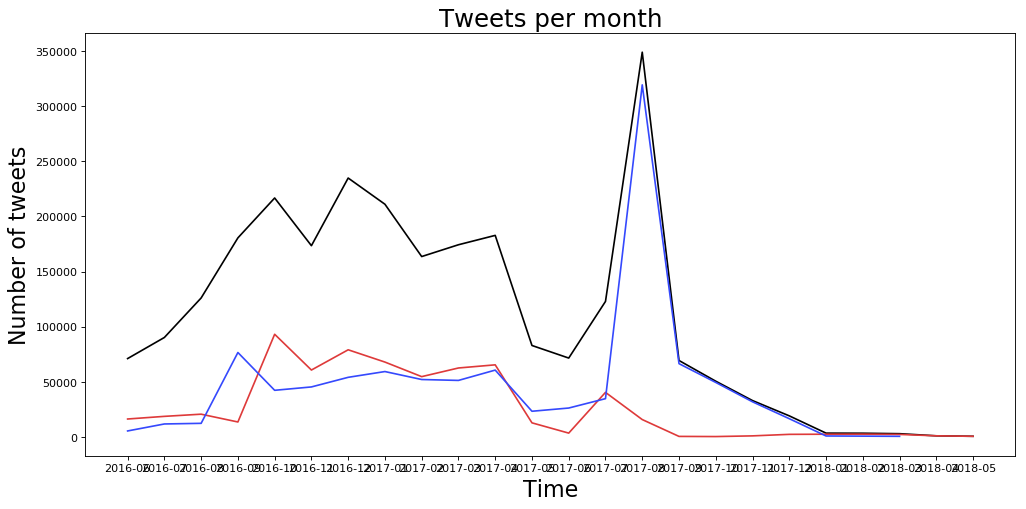

In [117]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(after_primaries_time.sort_index(), color = "#000000")
plt.plot(ap_left_count.sort_index(), color = "#DE3A3A")
plt.plot(ap_right_count.sort_index(), color = "#3549FD")
name_axises("Tweets per month", "Time", "Number of tweets")
#må

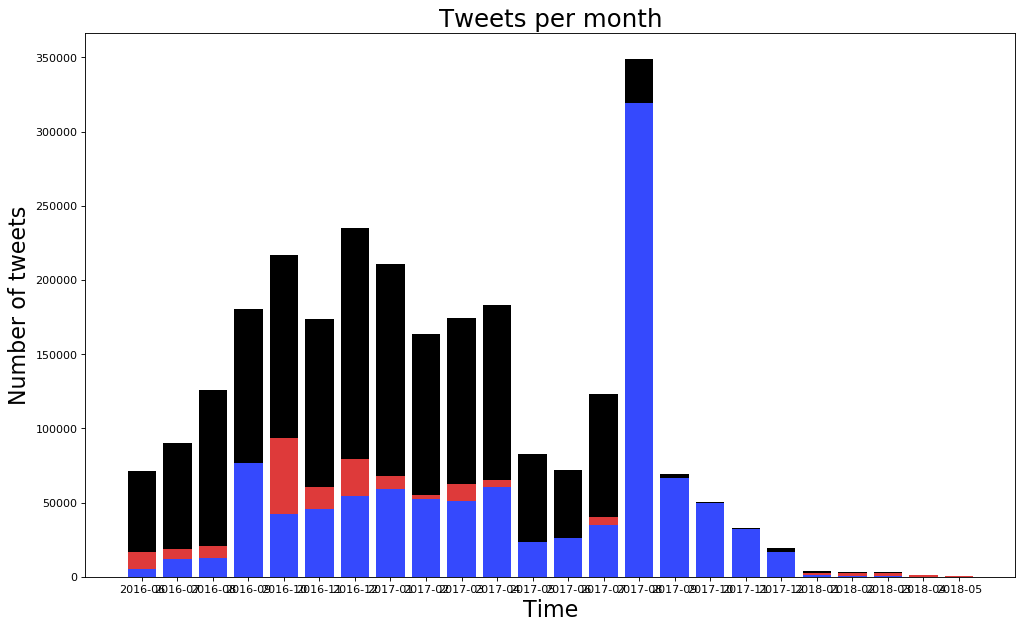

In [127]:
figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k',)
plt.bar(after_primaries_time.index, after_primaries_time, color = "#000000")
plt.bar(ap_left_count.index, ap_left_count, color = "#DE3A3A")
plt.bar(ap_right_count.index, ap_right_count, color = "#3549FD")
name_axises("Tweets per month", "Time", "Number of tweets")

#set legends.

### Before primaries

The first person that entered and started the primaries was Ted Cruz who officially entered the campaign on th 23th of March 2015. Hillary joined in as the first Democratic candidat on 12th April 2015. Donald Trump announced his candidacy on 16th June 2015.

Therefore it is interesting to look at the amount of tweets from each side, starting with Ted Cruz' announcement. Which party has seen the most meddling, building up to the first primaries, the period between primaries and election and after the election.

In [139]:
before_primaries = english_parqdata.loc[english_parqdata["publish_date"] < "2016-06-14"]
before_primaries = before_primaries.loc[before_primaries["publish_date"] > "2015-03-23"]
before_primaries_time = before_primaries["publish_date"].map(lambda x: str(x)[:7]).value_counts()
#left
before_primaries_left = before_primaries.loc[before_primaries["account_type"] == "left"]
bp_left_count = before_primaries_left["publish_date"].map(lambda x: str(x)[:7]).value_counts()
#right
before_primaries_right = before_primaries.loc[before_primaries["account_type"] == "Right"]
bp_right_count = before_primaries_right["publish_date"].map(lambda x: str(x)[:7]).value_counts()



Plotting

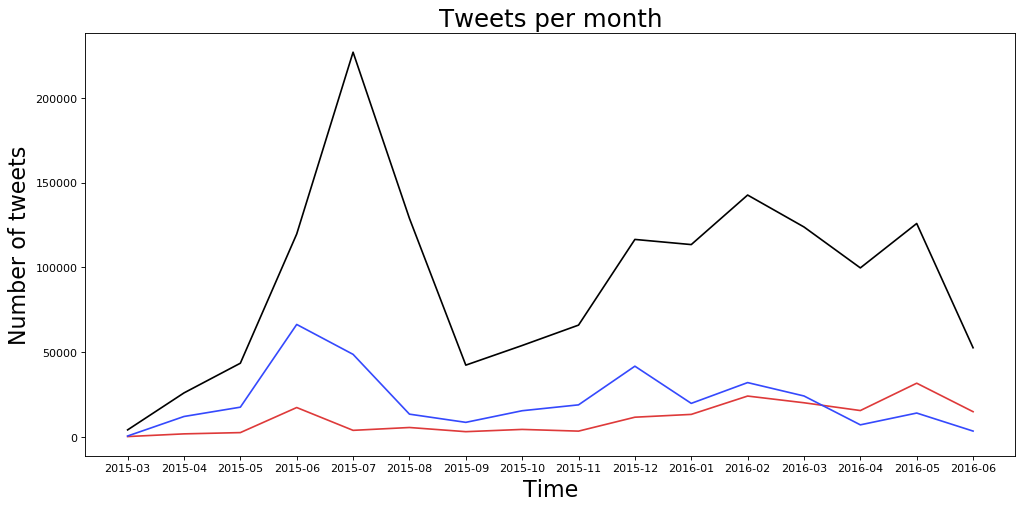

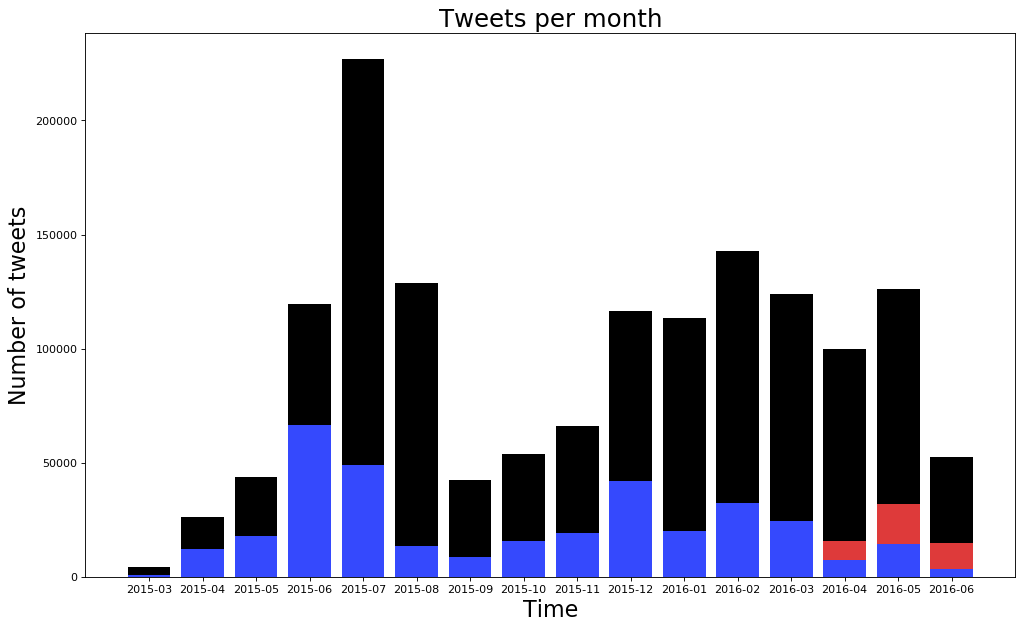

In [140]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(before_primaries_time.sort_index(), color = "#000000")
plt.plot(bp_left_count.sort_index(), color = "#DE3A3A")
plt.plot(bp_right_count.sort_index(), color = "#3549FD")
name_axises("Tweets per month", "Time", "Number of tweets")

figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k',)
plt.bar(before_primaries_time.index, before_primaries_time, color = "#000000")
plt.bar(bp_left_count.index, bp_left_count, color = "#DE3A3A")
plt.bar(bp_right_count.index, bp_right_count, color = "#3549FD")
name_axises("Tweets per month", "Time", "Number of tweets")

Things really started when the first people startet announcing their candidacy. In the beginning, after the first announced candidacy, it is almost an exponential growth of tweets. We can also see that it is a lot of tweets that are not political categorized as well. Let's have a small look at what happened in the month Hillary announced her candidacy.

In [191]:
hillary_month = english_parqdata.loc[english_parqdata["publish_date"] > "2015-04"]
hillary_month = hillary_month.loc[hillary_month["publish_date"] < "2015-05"]
hm_count = hillary_month["publish_date"].map(lambda x: str(x)[8:10]).value_counts()

#left
hm_left = hillary_month.loc[hillary_month["account_type"] == "left"]
hm_left_count = hm_left["publish_date"].map(lambda x: str(x)[8:10]).value_counts()
#right
hm_right = hillary_month.loc[hillary_month["account_type"] == "Right"]
hm_right_count = hm_right["publish_date"].map(lambda x: str(x)[8:10]).value_counts()



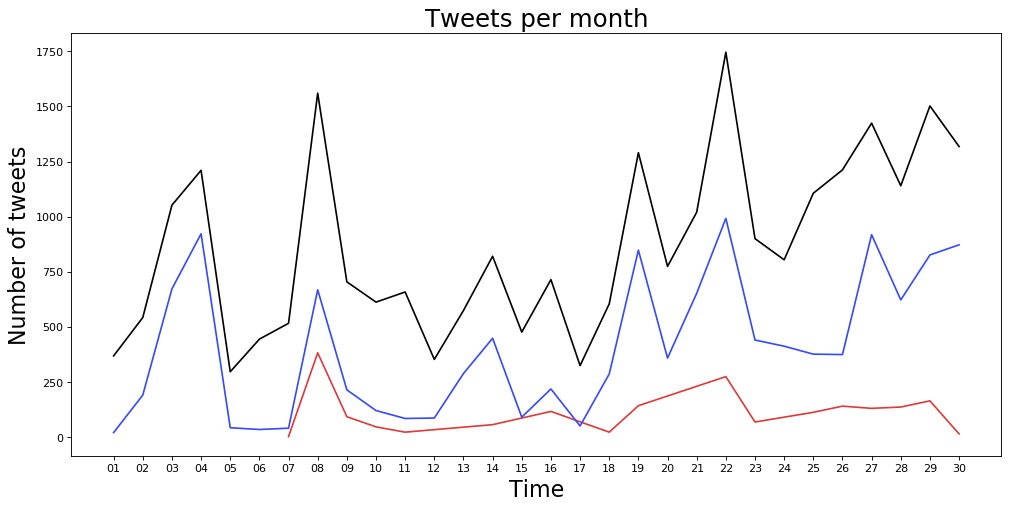

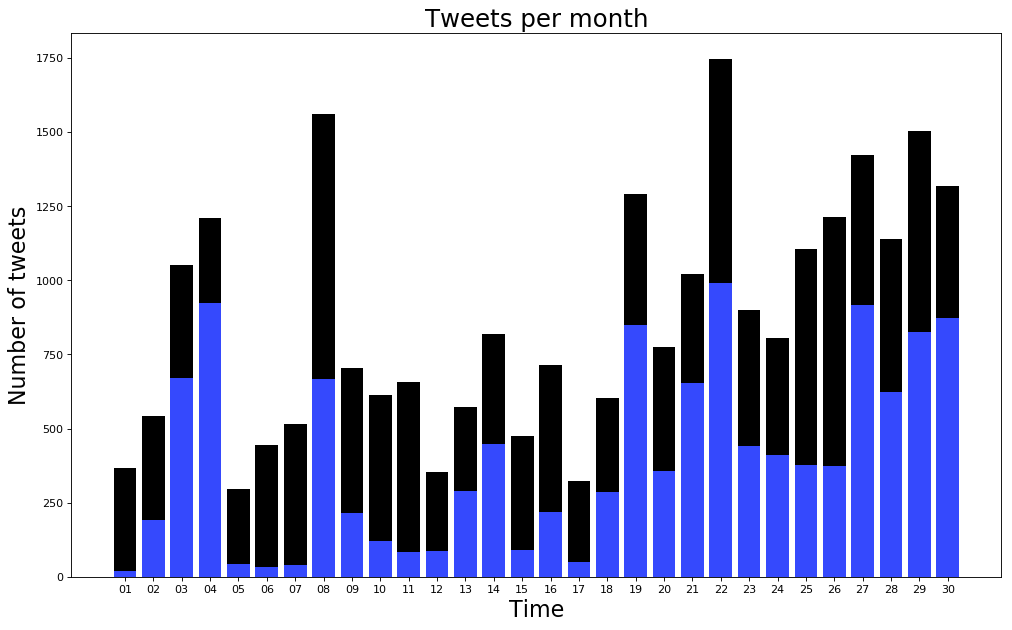

In [192]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hm_count.sort_index(), color = "#000000")
plt.plot(hm_left_count.sort_index(), color = "#DE3A3A")
plt.plot(hm_right_count.sort_index(), color = "#3549FD")
name_axises("Tweets per month", "Time", "Number of tweets")

figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k',)
plt.bar(hm_count.index, hm_count, color = "#000000")
plt.bar(hm_left_count.index, hm_left_count, color = "#DE3A3A")
plt.bar(hm_right_count.index, hm_right_count, color = "#3549FD")
name_axises("Tweets per month", "Time", "Number of tweets")

In [84]:
out1 = widgets.Output()
out2 = widgets.Output()
data1 = pd.DataFrame(np.random.normal(size = 50))
data2 = pd.DataFrame(np.random.normal(size = 100))

tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'First')
tab.set_title(1, 'Second')
display(tab)

with out1:
    fig1, axes1 = plt.subplots()
    data1.hist(ax = axes1)
    plt.show(fig1)

with out2:
    fig2, axes2 = plt.subplots()
    data2.hist(ax = axes2)
    plt.show(fig2)